In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
# pip install openpyxl

In [3]:
nswmap = pd.read_excel('../data/nsw-site-location-and-details.xlsx')
print(nswmap.shape)
nswmap.head(3)

(2255, 12)


,Site2,Site_distance,Community,Latitude,Longitude,Easting,Northing,Zone,Datum,Location name,Tenure,Date sampled
0,CYP_001,CYP_001_000,Cypress pine,-32.314901,145.820500,6424048,388969,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11
1,CYP_001,CYP_001_050,Cypress pine,-32.314476,145.820346,6424095,388954,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11
2,CYP_001,CYP_001_100,Cypress pine,-32.314051,145.820182,6424142,388938,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11


In [4]:
nswmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255 entries, 0 to 2254
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Site2          2255 non-null   object        
 1   Site_distance  2255 non-null   object        
 2   Community      2255 non-null   object        
 3   Latitude       2255 non-null   float64       
 4   Longitude      2255 non-null   float64       
 5   Easting        2255 non-null   int64         
 6   Northing       2255 non-null   int64         
 7   Zone           2255 non-null   int64         
 8   Datum          2255 non-null   object        
 9   Location name  2255 non-null   object        
 10  Tenure         2255 non-null   object        
 11  Date sampled   2255 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 211.5+ KB


In [5]:
nswmap['geometry'] = nswmap.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
nswmap.head(3)

,Site2,Site_distance,Community,Latitude,Longitude,Easting,Northing,Zone,Datum,Location name,Tenure,Date sampled,geometry
0,CYP_001,CYP_001_000,Cypress pine,-32.314901,145.820500,6424048,388969,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11,POINT (145.820500115668 -32.3149014417796)
1,CYP_001,CYP_001_050,Cypress pine,-32.314476,145.820346,6424095,388954,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11,POINT (145.820346292351 -32.3144760386447)
2,CYP_001,CYP_001_100,Cypress pine,-32.314051,145.820182,6424142,388938,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11,POINT (145.820181849289 -32.3140505360327)


In [6]:
nswmap = gpd.GeoDataFrame(nswmap, 
                           crs = 'EPSG:4326', 
                           geometry = nswmap['geometry'])

In [7]:
nswmap.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
type(nswmap)

geopandas.geodataframe.GeoDataFrame

<Axes: >

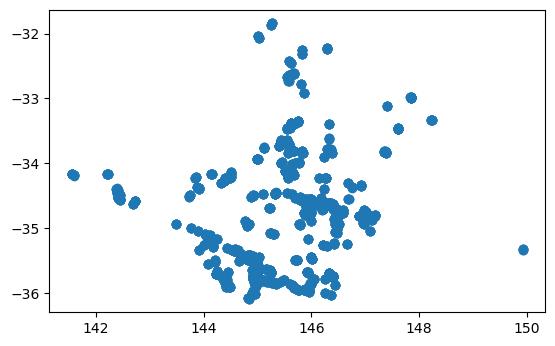

In [9]:
nswmap.plot()

<Axes: >

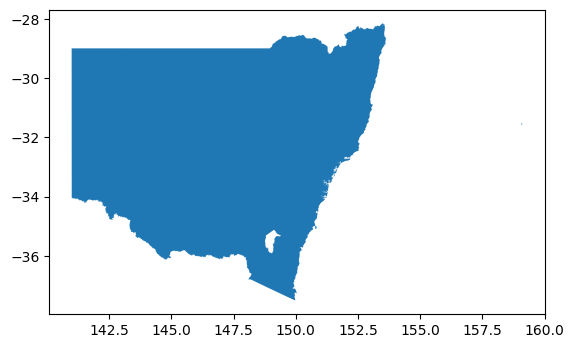

In [10]:
geodata = gpd.read_file('../data/STE_2021_AUST_GDA2020.shp')
nsw = geodata[geodata['STE_NAME21']== 'New South Wales']
nsw.plot()

In [11]:
nsw.crs = nswmap.crs

In [12]:
nsw.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

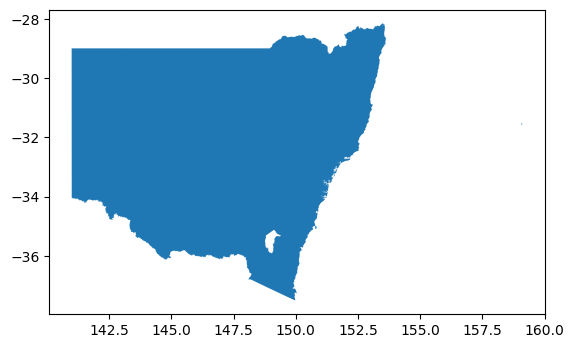

In [13]:
nsw.plot()

In [14]:
nswmap.head()

,Site2,Site_distance,Community,Latitude,Longitude,Easting,Northing,Zone,Datum,Location name,Tenure,Date sampled,geometry
0,CYP_001,CYP_001_000,Cypress pine,-32.314901,145.820500,6424048,388969,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11,POINT (145.82050 -32.31490)
1,CYP_001,CYP_001_050,Cypress pine,-32.314476,145.820346,6424095,388954,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11,POINT (145.82035 -32.31448)
2,CYP_001,CYP_001_100,Cypress pine,-32.314051,145.820182,6424142,388938,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11,POINT (145.82018 -32.31405)
3,CYP_001,CYP_001_150,Cypress pine,-32.313625,145.819986,6424189,388919,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11,POINT (145.81999 -32.31362)
4,CYP_001,CYP_001_200,Cypress pine,-32.313208,145.819800,6424235,388901,55,MGA94,Bedooba State Conservation Area,National Park,2013-09-11,POINT (145.81980 -32.31321)


In [15]:
type(nsw)

geopandas.geodataframe.GeoDataFrame

In [16]:
nsw_map = gpd.sjoin(nsw, nswmap, predicate = 'within')

In [17]:
border = nsw.loc[nsw['STE_NAME21'] == 'New South Wales']
border.shape

(1, 9)

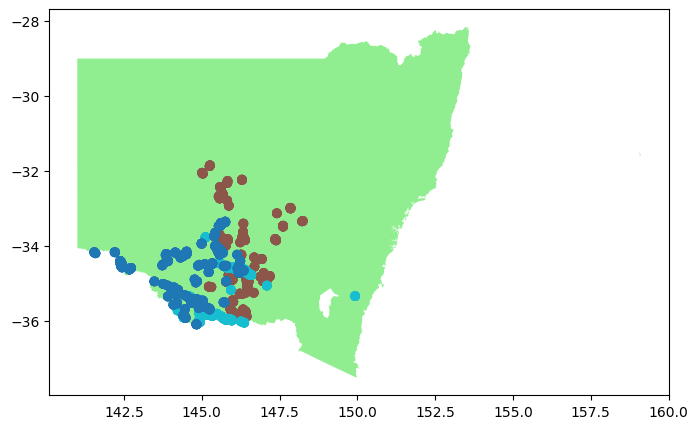

In [18]:
ax = border.plot(figsize = (8, 10), color = 'lightgreen')
nswmap.plot( ax = ax, column = 'Community');
plt.show();

In [19]:
border.geometry.centroid

C:\Users\HP\AppData\Local\Temp\ipykernel_19448\1165773.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  border.geometry.centroid


0    POINT (147.00820 -32.16562)
dtype: geometry

In [20]:
center = border.geometry.centroid[0]

C:\Users\HP\AppData\Local\Temp\ipykernel_19448\4157547962.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = border.geometry.centroid[0]


In [21]:
print(center)

POINT (147.00819583947575 -32.16561978542047)


## Folium requires a location point as an array with latitude first
but shapely Points have longitude first

In [24]:
center.y

-32.16561978542047

In [25]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[-32.16561978542047, 147.00819583947575]


To create a folium map just call the folium Map() constructor
location is the only argument required by the constructor
Set area_center as the location of the folium map.
zoom_start is an optional argument
A setting of 12 should get us nice and close

In [26]:
#create our map of NSW and show it
map_nsw = folium.Map(location =  area_center, zoom_start = 10)
map_nsw